In [1]:
import os
root="/content/drive/MyDrive/Colab Notebooks"

In [2]:
os.chdir(root)

In [3]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [4]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [5]:
tf.keras.__version__

'2.5.0'

In [6]:
# Checking GPU
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
# Checking CPU
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
Checklist=["GPU","CPU"]

for device in Checklist:
  out=tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available")
    print("Details :",out)
  else:
    print(f"{device} is not available")

GPU is available
Details : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
Details : [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [9]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
mnist=tf.keras.datasets.mnist

(X_train_full,y_train_full),(X_test_full,y_test_full)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
y_train_full.shape

(60000,)

In [13]:
X_test_full.shape

(10000, 28, 28)

In [14]:
y_test_full.shape

(10000,)

In [15]:
X_train_full.dtype

dtype('uint8')

"unit8" means values are in between 0-2**8 i.e. 0 - 255

- **Scaling to convert int into 0 to 1.**

-Top 5000 data of X_train_full are in validation set of X_train_full and the rest of data is in X_train

In [16]:
X_valid,X_train=X_train_full[:5000]/255. ,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000] ,y_train_full[5000:]

(-0.5, 27.5, 27.5, -0.5)

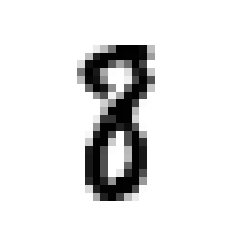

In [17]:
plt.imshow(X_train[50],cmap="binary")
plt.axis("off") #Off the axes shown

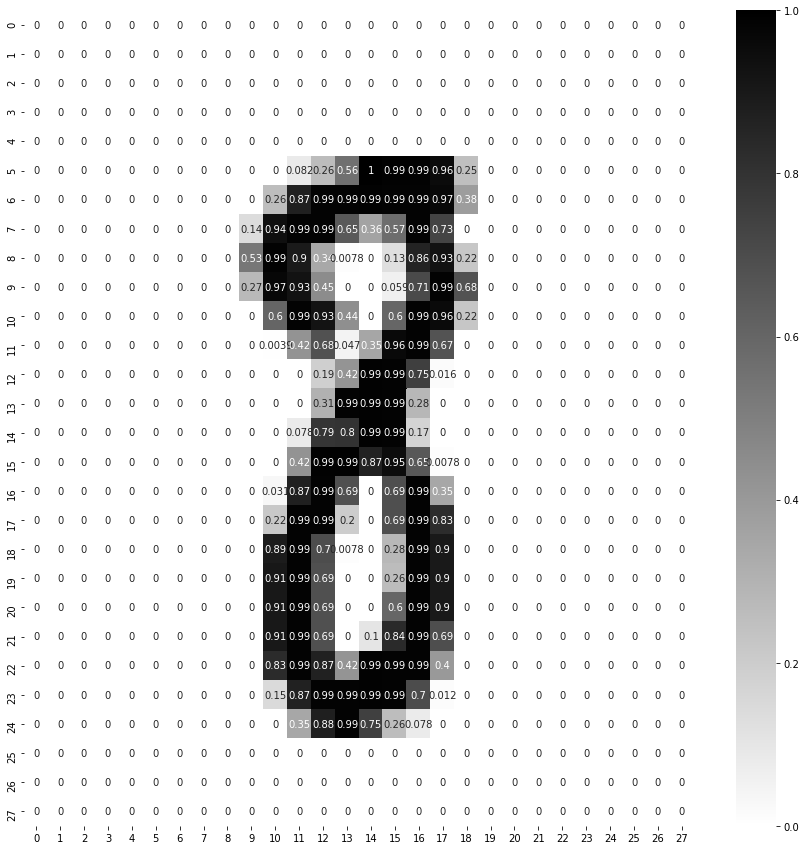

In [18]:
# Visualizing pixel values using Heatmaps
plt.figure(figsize=(15,15))
sns.heatmap(X_train[50],annot=True,cmap="binary") #Annot represents all values

In [19]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="InputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="HiddenLayer_1"),
        tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer_2"),
        tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer")]

In [20]:
# Defining model classifier
model_clf=tf.keras.models.Sequential(LAYERS)

In [21]:
model_clf.layers

In [22]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 300)               235500    
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 100)               30100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
# No of paramerters
print("Parameter in 1st hidden layer :",784*300+300)
print("Parameter in 2nd hidden layer :",300*100+100)
print("Parameter in last layer :",10*100+10)
print("\n")
print("Total no of parameters :",784*300+300 + 300*100+100 + 10*100+10)

Parameter in 1st hidden layer : 235500
Parameter in 2nd hidden layer : 30100
Parameter in last layer : 1010


Total no of parameters : 266610
